<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><ul class="toc-item"><li><span><a href="#Импорт-библиотек" data-toc-modified-id="Импорт-библиотек-0.1">Импорт библиотек</a></span></li></ul></li><li><span><a href="#Загрузка-данных" data-toc-modified-id="Загрузка-данных-1">Загрузка данных</a></span></li><li><span><a href="#Предобработка-и-анализ-данных" data-toc-modified-id="Предобработка-и-анализ-данных-2">Предобработка и анализ данных</a></span><ul class="toc-item"><li><span><a href="#Исследовательский-анализ" data-toc-modified-id="Исследовательский-анализ-2.1">Исследовательский анализ</a></span></li><li><span><a href="#Графический-анализ" data-toc-modified-id="Графический-анализ-2.2">Графический анализ</a></span></li><li><span><a href="#Подготовка-данных-к-построению-модели" data-toc-modified-id="Подготовка-данных-к-построению-модели-2.3">Подготовка данных к построению модели</a></span></li><li><span><a href="#Вывод" data-toc-modified-id="Вывод-2.4">Вывод</a></span></li></ul></li><li><span><a href="#Построение-базовой-нейронной-сети" data-toc-modified-id="Построение-базовой-нейронной-сети-3">Построение базовой нейронной сети</a></span><ul class="toc-item"><li><span><a href="#Нейронная-сеть-с-одним-скрытым-слоем" data-toc-modified-id="Нейронная-сеть-с-одним-скрытым-слоем-3.1">Нейронная сеть с одним скрытым слоем</a></span></li><li><span><a href="#Нейронная-сеть-с-двумя-скрытыми-слоями" data-toc-modified-id="Нейронная-сеть-с-двумя-скрытыми-слоями-3.2">Нейронная сеть с двумя скрытыми слоями</a></span></li><li><span><a href="#Нейронная-сеть-с-тремя-скрытыми-слоями" data-toc-modified-id="Нейронная-сеть-с-тремя-скрытыми-слоями-3.3">Нейронная сеть с тремя скрытыми слоями</a></span></li><li><span><a href="#Проверка-НС-с-двумя-скрытыми-слоями-на-тестовой-выборке" data-toc-modified-id="Проверка-НС-с-двумя-скрытыми-слоями-на-тестовой-выборке-3.4">Проверка НС с двумя скрытыми слоями на тестовой выборке</a></span></li><li><span><a href="#Вывод" data-toc-modified-id="Вывод-3.5">Вывод</a></span></li></ul></li><li><span><a href="#Улучшение-нейронной-сети" data-toc-modified-id="Улучшение-нейронной-сети-4">Улучшение нейронной сети</a></span><ul class="toc-item"><li><span><a href="#Проверка-улучшенной-НС-на-тестовой-выборке" data-toc-modified-id="Проверка-улучшенной-НС-на-тестовой-выборке-4.1">Проверка улучшенной НС на тестовой выборке</a></span></li></ul></li><li><span><a href="#Выводы" data-toc-modified-id="Выводы-5">Выводы</a></span></li></ul></div>

# Прогнозирование температуры звезды

От обсерватории «Небо на ладони» пришла задача: придумать, как с помощью нейросети определять температуру на поверхности обнаруженных звёзд. Обычно для расчёта температуры учёные пользуются следующими методами:
* Закон смещения Вина.
* Закон Стефана-Больцмана.
* Спектральный анализ.

Каждый из них имеет плюсы и минусы. Обсерватория хочет внедрить технологии машинного обучения для предсказания температуры звёзд, надеясь, что этот метод будет наиболее точным и удобным.

В базе обсерватории есть характеристики уже изученных 240 звёзд.


**Цель проекта:**  
разработать нейронную сеть, которая поможет предсказывать абсолютную температуру на поверхности звезды.

**Задачи проекта:**
* проведение исследовательского анализа данных с использованием графического анализа
* подготовка данных к построению модели: подготовка обучающей и тестовой выборки, мастшабирование данных
* построение базовой модели нейронной сети: создание архитектуры сети
* улучшение сети: подбор параметров. 

В результате обучения нейроной сети метрика RMSE на тестовых данных не должна превышать 4500.

### Импорт библиотек

In [1]:
import random
import pandas as pd
import numpy as np
from math import ceil
    
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline   

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder


import torch
import torch.nn as nn
from torch.utils.data import Dataset, DataLoader

pd.options.mode.chained_assignment = None
pd.options.display.float_format = '{:,.3f}'.format

import warnings
warnings.simplefilter("ignore", ResourceWarning)
warnings.simplefilter("ignore", FutureWarning)


random.seed(0)
np.random.seed(0)
torch.manual_seed(0)
torch.use_deterministic_algorithms(True)
RANDOM_STATE = 0

## Загрузка данных

Для первичного ознакомления с данными выведем первые 5 строк таблицы, а также получим информацию о таблице с помощью метода `info()`.

In [3]:
print(df.info())
df.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 240 entries, 0 to 239
Data columns (total 6 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Temperature (K)         240 non-null    int64  
 1   Luminosity(L/Lo)        240 non-null    float64
 2   Radius(R/Ro)            240 non-null    float64
 3   Absolute magnitude(Mv)  240 non-null    float64
 4   Star type               240 non-null    int64  
 5   Star color              240 non-null    object 
dtypes: float64(3), int64(2), object(1)
memory usage: 13.1+ KB
None


,Temperature (K),Luminosity(L/Lo),Radius(R/Ro),Absolute magnitude(Mv),Star type,Star color
Unnamed: 0,,,,,,
0,3068,0.002,0.170,16.120,0,Red
1,3042,0.001,0.154,16.600,0,Red
2,2600,0.000,0.102,18.700,0,Red
3,2800,0.000,0.160,16.650,0,Red
4,1939,0.000,0.103,20.060,0,Red


Согласно документации к данным, в таблице содержатся:

**Целевой признак**
* Абсолютная температура T(K) — температура на поверхности звезды в Кельвинах.

**Признаки**
* Относительная светимость `L/Lo` — светимость звезды относительно Солнца.
* Относительный радиус `R/Ro` — радиус звезды относительно радиуса Солнца.
* Абсолютная звёздная величина `Mv` — физическая величина, характеризующая блеск звезды.
* Звёздный цвет (white, red, blue, yellow, yellow-orange и др.) — цвет звезды, который определяют на основе спектрального анализа.
* Тип звезды - указан номер, которому соответстсвует тип звезды из таблицы `star_type_dict` ниже



In [4]:
star_type_dict = {'star_type': ['Коричневый карлик',
                               'Красный карлик',
                               'Белый карлик',
                               'Звёзды главной последовательности',
                               'Сверхгигант',
                               'Гипергигант'],
                 'number': [0, 1, 2, 3, 4, 5]}
star_type_dict = pd.DataFrame(data=star_type_dict)
star_type_dict

,star_type,number
0,Коричневый карлик,0
1,Красный карлик,1
2,Белый карлик,2
3,Звёзды главной последовательности,3
4,Сверхгигант,4
5,Гипергигант,5


Для удобства работы с таблицей переименуем столбцы.

In [5]:
df.rename(columns={'Temperature (K)': 'temperature',
                   'Luminosity(L/Lo)': 'luminosity', 
                   'Radius(R/Ro)': 'radius',
                   'Absolute magnitude(Mv)': 'magnitude', 
                   'Star type': 'star_type', 
                   'Star color': 'star_color'}, inplace=True)
df.index.name = 'idx'
df.head(2)

,temperature,luminosity,radius,magnitude,star_type,star_color
idx,,,,,,
0,3068,0.002,0.170,16.120,0,Red
1,3042,0.001,0.154,16.600,0,Red


Итак, в таблице предствлены 240 записей, в которых содержатся целевой признак (температура звезды) и 5 признаков, среди которых присутствуют количественные (относительные светимость и радиус, абсолютная звёздная величина), а также категориальные признаки (тип звезды и цвет звезды).

## Предобработка и анализ данных

### Исследовательский анализ

**Проверка категориальных признаков**

Выведем уникальные значения категориальных столбцов.

In [6]:
for _ in ['star_type', 'star_color']:
    print(_)
    print(df[_].unique())
    print('Number of categories:', len(df[_].unique()))
    print()

star_type
[0 1 2 3 4 5]
Number of categories: 6

star_color
['Red' 'Blue White' 'White' 'Yellowish White' 'Blue white'
 'Pale yellow orange' 'Blue' 'Blue-white' 'Whitish' 'yellow-white'
 'Orange' 'White-Yellow' 'white' 'Blue ' 'yellowish' 'Yellowish'
 'Orange-Red' 'Blue white ' 'Blue-White']
Number of categories: 19



В столбце `star_color` присутствуют неявные дубликаты: избавимся от лишних пробелов и дефисов, приведём все значения к нижнему регистру.

In [7]:
df['star_color'] = df['star_color'].map(lambda x: x.strip().lower().replace('-', ' '))
for _ in range(len(df)):
    if df.loc[_, 'star_color'] == 'white yellow':
        df.loc[_, 'star_color'] = 'yellow white'

print(df['star_color'].unique())
print('Number of categories:', len(df['star_color'].unique()))


['red' 'blue white' 'white' 'yellowish white' 'pale yellow orange' 'blue'
 'whitish' 'yellow white' 'orange' 'yellowish' 'orange red']
Number of categories: 11


Количество категорий в столбце `star_color` уменьшилось, категории стали уникальными.

**Проверка числовых признаков**

Выведем информацию по количественным признакам с помощью метода `describe()`.

In [8]:
df.loc[:, ['temperature', 'luminosity', 'radius', 'magnitude']].describe()

,temperature,luminosity,radius,magnitude
count,240.000,240.000,240.000,240.000
mean,"10,497.462","107,188.362",237.158,4.382
std,"9,552.425","179,432.245",517.156,10.533
min,"1,939.000",0.000,0.008,-11.920
25%,"3,344.250",0.001,0.103,-6.232
50%,"5,776.000",0.071,0.762,8.313
75%,"15,055.500","198,050.000",42.750,13.697
max,"40,000.000","849,420.000","1,948.500",20.060


В значениях не содержится аномалий: нет отрицательных значений там, где их не должно быть. Убедимся, что в значениях относительной светимости нет нулей:

In [9]:
df.query('luminosity > 0').shape[0]

240

**Проверка дубликатов и нулевых значений**

In [10]:
print('Duplicates:', df.duplicated().sum())
print('\nNULL:', df.isna().sum().sum())

Duplicates: 0

NULL: 0


### Графический анализ

ДЛя каждого признака построим гистограмму его распределения.

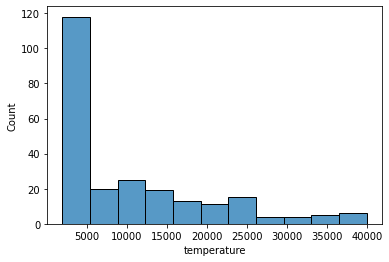

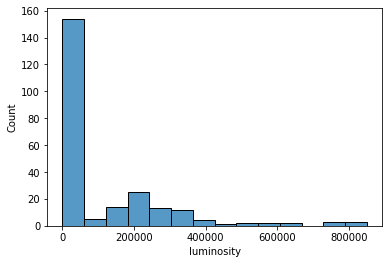

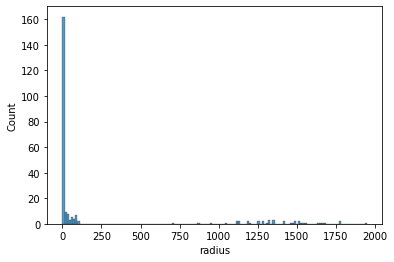

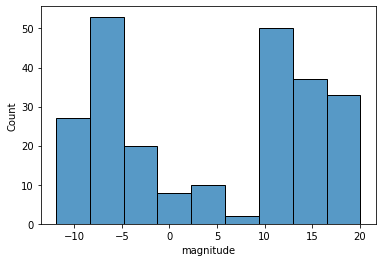

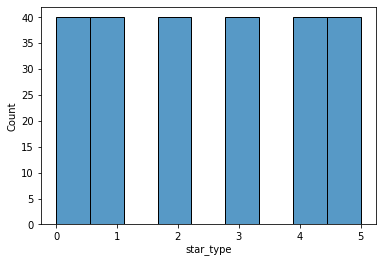

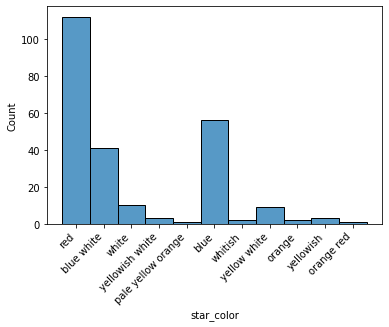

In [11]:
for _ in df.columns:
    sns.histplot(data=df, x=_)
    if _ == 'star_color':
        plt.xticks(rotation=45, ha='right')
    plt.show();

Анализ гистограмм позволяет увидеть следующие зависимости:
* распределение температуры звёзд имеет максимум в области значений до 5000К. Интересно, что температура поверхности Солнца составляет примерно 6000К, следовательно, в выборке большую часть представляют звезды холоднее Солнца (это видно также из информации, полученной методом describe()).
* распределения светимости и радиуса имеет ярко выраженный максимум в области значений, близких к нулю. Это значит, что большинство представленных в таблице звёзд имеют гораздо меньший радиус и меньшее значение светимости, чем у Солнца. Однако в этих гистограммах также имеется "тяжелый хвост", соответствующий объектам гораздо большего размера, чем Солнце, и с большим значением светимости. Не будем считать эти объекты выбросами, поскольку избавление от "выбросов" значительно уменьшит нашу и без того небольшую выборку.
* значения абсолютной звездной величины имеют два максимума по обе стороны от среднего значения этой величины 4.4 (значение для Солнца - 4,8).
* типы звёзд в выборке представлены поровну.
* наиболее часто представлены красные (более 100 объектов) и голубые (более 50 объектов) звезды.



Построим тепловую карту корреляций признаков.

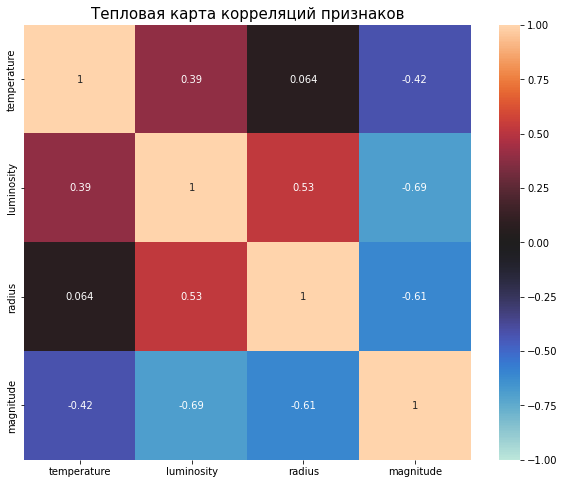

In [12]:
plt.figure(figsize=(10, 8))
sns.heatmap(df.loc[:, ['temperature', 'luminosity', 'radius', 'magnitude']].corr(), 
            annot=True,
            vmin=-1, vmax=1, center=0)
plt.title('Тепловая карта корреляций признаков', fontsize=15);

Целевой признак сильнее всего коррелирует с абсолютной звездной величиной (коэффициент корреляции -0.42), но величина корреляции недостаточна для того, чтобы говорить об обратной линейной зависимости.  
Сама же абсолютная звездная величина обратно коррелирует со светимостью и радиусом, но линейной зависимости между ними также нет.

Визуализируем попарные отношения в данных с помощью pairplot.

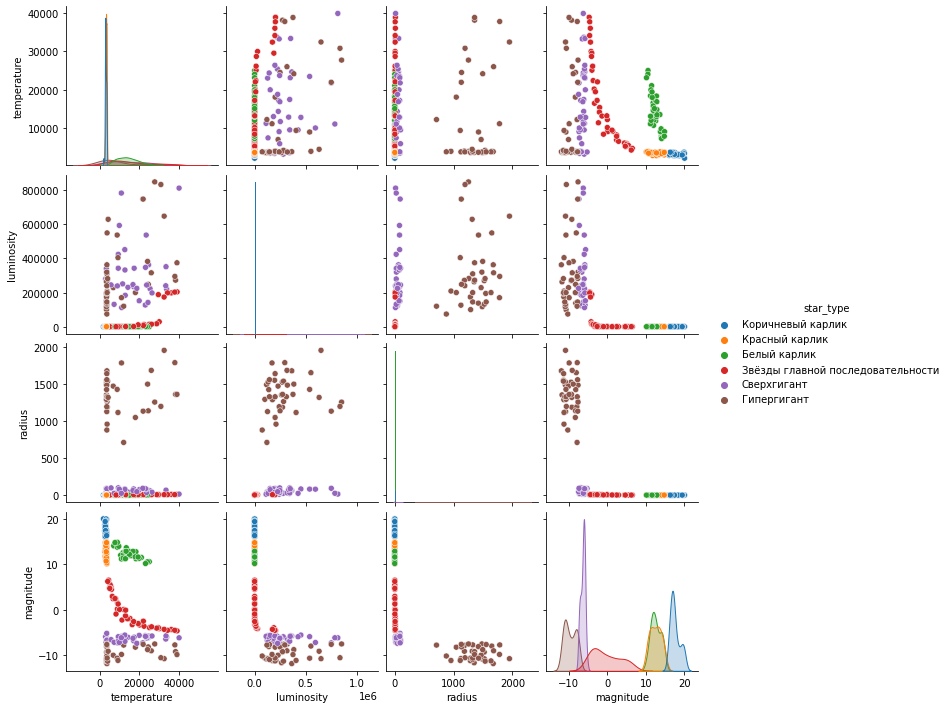

In [13]:
# заменим тип звезды с числового вида на расшифровку из таблицы star_type_dict
df_star_type = df
for _ in range(len(df_star_type)):
    for k in range(len(star_type_dict)):
        if df_star_type.loc[_, 'star_type'] == star_type_dict.loc[k, 'number']:
            df_star_type.loc[_, 'star_type'] = star_type_dict.loc[k, 'star_type']
            
sns.pairplot(df, hue="star_type");

Особый интерес на полученном графике представляет зависимость абсолютной звездной величины от температуры. 
 
Рассмотрим данный график поближе и инвертируем оси.

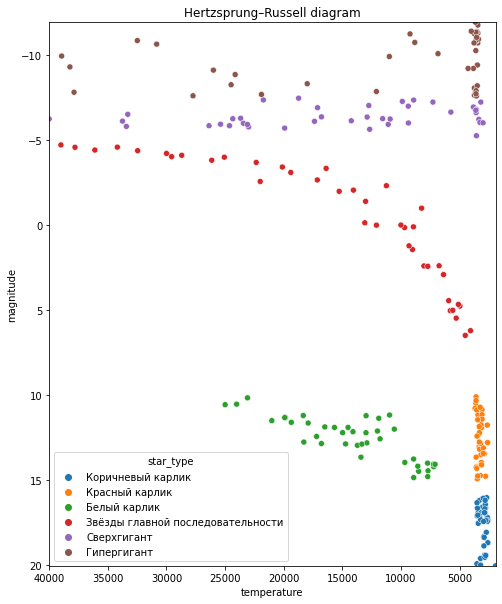

In [14]:
plt.figure(figsize=(8, 10))
sns.scatterplot(x='temperature', y='magnitude', data=df_star_type, hue='star_type')
plt.title("Hertzsprung–Russell diagram")
plt.xlim(max(df_star_type['temperature']), min(df_star_type['temperature']))
plt.ylim(max(df_star_type['magnitude']), min(df_star_type['magnitude']))
plt.show()

Этот график представляет собой упрощенный вариант диаграммы Герцшпрунга-Рассела, на котором видно четкое разделение на кластеры, отвечающие разным типам звёзд.   
Точки, соответствующие звёздам, на диаграмме оказываются распределены не равномерно, а сосредоточены в нескольких областях. Такое распределение отражает особенности формирования звёзд и хода их эволюции: положение звезды на диаграмме зависит от её массы, возраста и химического состава.   
[Диаграмма Герцшпрунга — Рассела](https://ru.wikipedia.org/wiki/%D0%94%D0%B8%D0%B0%D0%B3%D1%80%D0%B0%D0%BC%D0%BC%D0%B0_%D0%93%D0%B5%D1%80%D1%86%D1%88%D0%BF%D1%80%D1%83%D0%BD%D0%B3%D0%B0_%E2%80%94_%D0%A0%D0%B0%D1%81%D1%81%D0%B5%D0%BB%D0%B0)

 <img src="https://upload.wikimedia.org/wikipedia/commons/6/6b/HRDiagram.png" width="600"/>

### Подготовка данных к построению модели

Выделим категориальные и количественные столбцы

In [15]:
categorical = ['star_type', 'star_color']
numeric = ['luminosity', 'radius', 'magnitude']

Выделим матрицу признаков и вектор целевого признака

In [16]:
features = df.drop(['temperature'], axis=1)
target = df['temperature']

print(features.shape)
print(target.shape)

(240, 5)
(240,)


Разделим выборку на тренировочную, валидационную и тестовую подвыборки, отмасштабируем количественные признаки.

In [17]:
def split_scale(features, target):
    """
    Функция принимает на вход таблицу признаков features и столбец целевого признака target, 
    и возвращает тренировочную, валидационную и тестовую выборку для features и target в соотношении 70:15:15
    """
    
    # разледим выборку на две части: обучающую и тестовую
    (features_train, features_test, 
     target_train, target_test) = train_test_split(features, 
                                                   target,
                                                   test_size=.3,
                                                   shuffle=True,
                                                   random_state=RANDOM_STATE)
    # разделим тестовую часть пополам - выделим валидационную часть
    (features_valid, features_test, 
     target_valid, target_test) = train_test_split(features_test, 
                                                   target_test,
                                                   test_size=.5,
                                                   shuffle=True,
                                                   random_state=RANDOM_STATE)

    scaler = StandardScaler()
    scaler.fit(features_train[numeric])
    features_train[numeric] = scaler.transform(features_train[numeric])
    features_valid[numeric] = scaler.transform(features_valid[numeric])
    features_test[numeric] = scaler.transform(features_test[numeric])
    

    return (features_train, features_valid, features_test,
           target_train, target_valid, target_test)

In [18]:
features_train, features_valid, features_test, \
target_train, target_valid, target_test = split_scale(features, target)

print('Train:', features_train.shape, target_train.shape)
print('Valid:', features_valid.shape, target_valid.shape)
print('Test:', features_test.shape, target_test.shape)

Train: (168, 5) (168,)
Valid: (36, 5) (36,)
Test: (36, 5) (36,)


Закодируем категориальные признаки методом One Hot Encoding (подходит для линейных моделей).

In [19]:
# One Hot Encoding
features_train_ohe = features_train.copy().reset_index()
features_valid_ohe = features_valid.copy().reset_index()
features_test_ohe = features_test.copy().reset_index()

ohe_encoder = OneHotEncoder(handle_unknown='ignore') 
ohe_encoder.fit(features_train_ohe[categorical]) 
    

features_train_ohe_cat = pd.DataFrame(ohe_encoder.transform(features_train_ohe[categorical]).toarray())
features_train_ohe = features_train_ohe.join(features_train_ohe_cat)
features_train_ohe = features_train_ohe.drop(['star_type', 'star_color', 'idx'], axis= 1)

features_valid_ohe_cat = pd.DataFrame(ohe_encoder.transform(features_valid_ohe[categorical]).toarray())
features_valid_ohe = features_valid_ohe.join(features_valid_ohe_cat)
features_valid_ohe = features_valid_ohe.drop(['star_type', 'star_color', 'idx'], axis= 1)


features_test_ohe_cat = pd.DataFrame(ohe_encoder.transform(features_test_ohe[categorical]).toarray())
features_test_ohe = features_test_ohe.join(features_test_ohe_cat)
features_test_ohe = features_test_ohe.drop(['star_type', 'star_color', 'idx'], axis= 1)

                                             
print('Train OHE:', features_train_ohe.shape)
print('Valid OHE:', features_valid_ohe.shape)
print('Test OHE:', features_test_ohe.shape)

Train OHE: (168, 19)
Valid OHE: (36, 19)
Test OHE: (36, 19)


### Вывод

В результате предобработки данных были выполнены следующие действия:
* обработаны категориальные значения в столбце `star_color`: категории приведены к одинаковому виду, удалены неявные дубликаты
* в количественных значениях аномалий не обнаружено, а также в данных отсуствуют пропуски и дубликаты
* построены гистограммы распределений каждого признака, обнаружено, что в представленной выборке типы звёзд представлены поровну
* ярко выраженной линейной зависимости между признаками обнаружено не было, однако попарная зависимость абсолютной звездной величины и температуры выявила четкое разделение на кластеры по типам звезд (диаграмма Герцшпрунга-Рассела).
* данные были подготовлены к задачам ML: разделены на тренировочную, валидационную и тестовую выборки, числовые признаки отмасштабированы, категориальные признаки перекодированы методом One Hot Encoding.

## Построение базовой нейронной сети

При обучении НС будем работаь с тензорами: приведём данные к соотвествующему типу.

In [20]:
X_train = torch.FloatTensor(features_train_ohe.values)
X_valid = torch.FloatTensor(features_valid_ohe.values)
X_test = torch.FloatTensor(features_test_ohe.values)

y_train = torch.FloatTensor(target_train.values)
y_valid = torch.FloatTensor(target_valid.values)
y_test = torch.FloatTensor(target_test.values)

X_train_valid = torch.cat((X_train, X_valid), 0)
y_train_valid = torch.cat((y_train, y_valid), 0)

In [21]:
dataset_train = torch.utils.data.TensorDataset(X_train, y_train)
dataset_valid = torch.utils.data.TensorDataset(X_valid, y_valid)

dataset_test = torch.utils.data.TensorDataset(X_test, y_test)
dataset_train_valid = torch.utils.data.TensorDataset(X_train_valid, y_train_valid)

In [22]:
train_dataloader = DataLoader(dataset_train, batch_size=168, shuffle=True,
                                  num_workers=0)
valid_dataloader = DataLoader(dataset_valid, batch_size=36, num_workers=0)


test_dataloader = DataLoader(dataset_test, batch_size=36, num_workers=0) 

train_valid_dataloader = DataLoader(dataset_train_valid, batch_size=240, num_workers=0) 

Рассмотрим 3 архитектуры НС:
* с одним скрытым слоем
* с двумя скрытыми слоями
* с тремя скрытыми слоями

Для каждого типа архитектуры рассмотрим пару комбинаций количества нейронов в скрытых слоях.

Создадим класс для определения RMSE.

In [23]:
class RMSELoss(torch.nn.Module):
    def __init__(self):
        super(RMSELoss,self).__init__()

    def forward(self,x,y):
        criterion = nn.MSELoss()
        loss = torch.sqrt(criterion(x, y))
        return loss

In [24]:
class EarlyStopping():
    """
    Ранняя остановка: останавливает обучение, когда значение функции потерь 
    не улучшается после определённой эпохи
    """
    def __init__(self, patience=5, min_delta=0):
        """
        :param patience: сколько эпох ждать до остановки, когда значение loss не уменьшается
        :param min_delta: минимальная разница между новым и старым значением loss, 
                        чтобы новое значение loss рассматривалась как улучшение
        """
        self.patience = patience
        self.min_delta = min_delta
        self.counter = 0
        self.best_loss = None
        self.early_stop = False
    def __call__(self, val_loss):
        if self.best_loss == None:
            self.best_loss = val_loss
        elif self.best_loss - val_loss > self.min_delta:
            self.best_loss = val_loss
            # reset counter if validation loss improves
            self.counter = 0
        elif self.best_loss - val_loss < self.min_delta:
            self.counter += 1
            #print(f"INFO: Early stopping counter {self.counter} of {self.patience}")
            if self.counter >= self.patience:
                print('INFO: Early stopping')
                self.early_stop = True


Создадим функцию, реализующую обучение модели НС и построение графика ошибки в зависимости от итерации обучения для тренировочной и тестовой выборки.

In [25]:
def net_training(net, hidden_layer_number, net_layers, num_epochs, optimizer, loss, 
                 train_dataloader, valid_dataloader):
    
    
    early_stopping = EarlyStopping(patience=4, min_delta=5)
    losses = []
    rmse_test = []   
    
    
    
    for epoch in range(num_epochs):
        #net.train()
        for batch in train_dataloader:
            data_train, temperature_train = batch
            # обнуление градиентов
            optimizer.zero_grad()  
        
            # прямое распространение на обучающих данных
            preds = net.forward(data_train).flatten()

            # вычисление значения функции потерь
            loss_value = loss.forward(preds, temperature_train)

            # вычисление градиентов
            loss_value.backward()

            # шаг оптимизации весов
            optimizer.step()

            # добавление значения ошибки в массив
            losses.append(loss_value.item())
        
        for batch in valid_dataloader:
            data_valid, temperature_valid = batch
            # перевод сети в режим предсказания
            net.eval()
            # прямое распространение на валидационных данных
            valid_preds = net.forward(data_valid).flatten()
            # вычисление ошибки на валидационных данных и добавление в массив
            rmse = loss.forward(valid_preds, temperature_valid)
            rmse_test.append(rmse.item())
        
        early_stopping(rmse)
        if early_stopping.early_stop:
            print('Early Stoppning: Epoch', epoch)
            print('RMSE test:', round(rmse.item(), 2))
            break 
        
    # построение графика RMSE для тренировочной и валидационной выборки    
    plt.figure(figsize=(10, 6))
    plt.plot(losses, label='train')
    plt.plot(rmse_test, label='valid')
    plt.legend(fontsize=12)

    plt.ylabel('RMSE', fontsize=12)
    plt.xlabel('epoch', fontsize=12)
    plt.title(f'НС с количеством скрытых слоёв: {hidden_layer_number}, ({net_layers})', fontsize=15)
    
        
    return plt.show()
 

### Нейронная сеть с одним скрытым слоем

Создадим архитектуру нейронной сети.

In [26]:
class Net_1hl(nn.Module):
    def __init__(self, n_in_neurons, n_hidden_neurons_1,
                 n_out_neurons):
        super(Net_1hl, self).__init__()

        self.fc1 = nn.Linear(n_in_neurons, n_hidden_neurons_1)
        self.act1 = nn.ReLU()

        self.fc2 = nn.Linear(n_hidden_neurons_1, n_out_neurons)
        

    def forward(self, x):
        x = self.fc1(x)
        x = self.act1(x)

        x = self.fc2(x)

        return x

**Комбинация №1**

In [27]:
net_layers_1_0 = [19, 2000, 1]

net_1hl_0 = Net_1hl(*net_layers_1_0)

optimizer = torch.optim.Adam(net_1hl_0.parameters(), lr=1e-2)

loss = RMSELoss()

num_epochs = 2000

INFO: Early stopping
Early Stoppning: Epoch 237
RMSE test: 5645.58


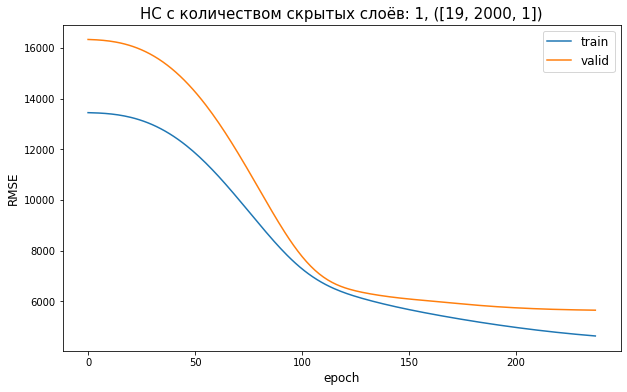

CPU times: user 3.08 s, sys: 116 ms, total: 3.19 s
Wall time: 1.7 s


In [28]:
%%time
net_training(net_1hl_0, 1, net_layers_1_0, num_epochs, optimizer, loss, train_dataloader, valid_dataloader)

**Комбинация №2**

In [29]:
net_layers_1_1 = [19, 1000, 1]

net_1hl_1 = Net_1hl(*net_layers_1_1)

optimizer = torch.optim.Adam(net_1hl_1.parameters(), lr=1e-2)

loss = RMSELoss()

num_epochs = 2000

INFO: Early stopping
Early Stoppning: Epoch 311
RMSE test: 5611.98


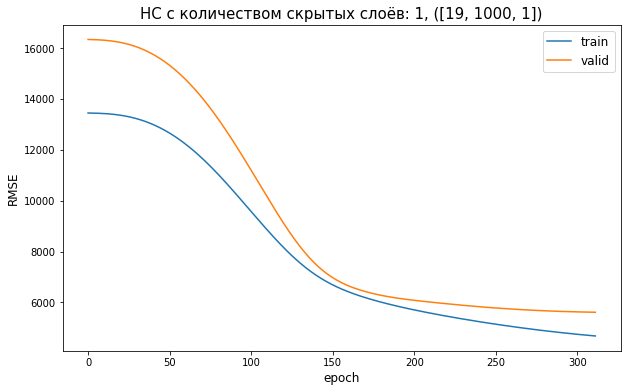

CPU times: user 3.17 s, sys: 20.2 ms, total: 3.19 s
Wall time: 1.68 s


In [30]:
%%time
net_training(net_1hl_1, 1, net_layers_1_1,  num_epochs, optimizer, loss, train_dataloader, valid_dataloader)

Из зависимости RMSE от итерации обучения для двух комбинаций НС с одним скрытым слоем можно заметить, что комбинация с большим количеством нейронов в скрытом слое (2000) обучается быстрее. Также видно, что за 2000 эпох обучения модель не успевает переобучиться, RMSE для валидационной выборки продолжает уменьшаться.

### Нейронная сеть с двумя скрытыми слоями

Создадим архитектуру нейронной сети.

In [31]:
class Net_2hl(nn.Module):
    def __init__(self, n_in_neurons, n_hidden_neurons_1,
                 n_hidden_neurons_2, n_out_neurons):
        super(Net_2hl, self).__init__()

        self.fc1 = nn.Linear(n_in_neurons, n_hidden_neurons_1)
        self.act1 = nn.Tanh()

        self.fc2 = nn.Linear(n_hidden_neurons_1, n_hidden_neurons_2)
        self.act2 = nn.ReLU()

        self.fc3 = nn.Linear(n_hidden_neurons_2, n_out_neurons)

    def forward(self, x):
        x = self.fc1(x)
        x = self.act1(x)

        x = self.fc2(x)
        x = self.act2(x)

        x = self.fc3(x)
        
        return x

**Комбинация №1**

In [32]:
net_layers_0 = [19, 2000, 1000, 1]
net_2hl_0 = Net_2hl(*net_layers_0)

optimizer = torch.optim.Adam(net_2hl_0.parameters(), lr=1e-3)

loss = RMSELoss()

num_epochs = 500

INFO: Early stopping
Early Stoppning: Epoch 235
RMSE test: 5903.09


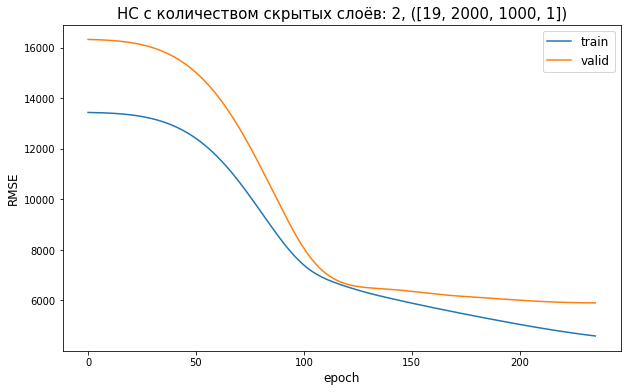

CPU times: user 17.8 s, sys: 1.38 s, total: 19.2 s
Wall time: 9.72 s


In [33]:
%%time
net_training(net_2hl_0, 2, net_layers_0, num_epochs, optimizer, loss, train_dataloader, valid_dataloader)

**Комбинация №2**

In [34]:
net_layers_1 = [19, 1000, 500, 1]
net_2hl_1 = Net_2hl(*net_layers_1)

optimizer = torch.optim.Adam(net_2hl_1.parameters(), lr=5e-3)

INFO: Early stopping
Early Stoppning: Epoch 58
RMSE test: 6641.21


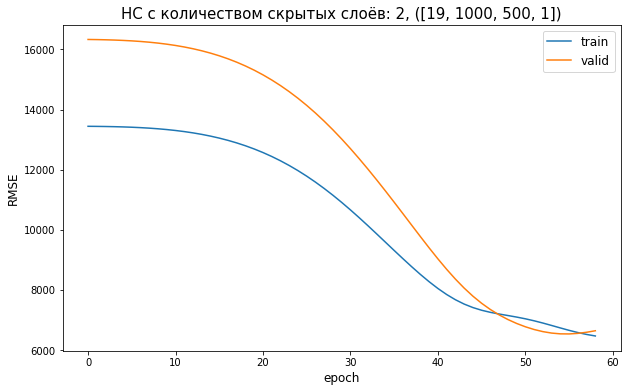

CPU times: user 1.62 s, sys: 28.6 ms, total: 1.64 s
Wall time: 915 ms


In [35]:
%%time
net_training(net_2hl_1, 2, net_layers_1, num_epochs, optimizer, loss, train_dataloader, valid_dataloader)

Как и в предыдущем случае, НС с большим количеством нейронов в скрытых слоях (2000 и 1000 - комбинация №1) обучается быстрее. При этом, примерно после 250 эпохи обучения НС начинает переобучаться. В целом, нейронная сеть с двумя скрытыми слоями обучается быстрее сети с одним скрытым слоем.

### Нейронная сеть с тремя скрытыми слоями

In [36]:
class Net_3hl(nn.Module):
    def __init__(self, n_in_neurons, n_hidden_neurons_1,
                 n_hidden_neurons_2, n_hidden_neurons_3, n_out_neurons):
        super(Net_3hl, self).__init__()

        self.fc1 = nn.Linear(n_in_neurons, n_hidden_neurons_1)
        self.act1 = nn.Tanh()

        self.fc2 = nn.Linear(n_hidden_neurons_1, n_hidden_neurons_2)
        self.act2 = nn.ReLU()
        
        self.fc3 = nn.Linear(n_hidden_neurons_2, n_hidden_neurons_3)
        self.act3 = nn.ReLU()

        self.fc4 = nn.Linear(n_hidden_neurons_3, n_out_neurons)
    

    def forward(self, x):
        x = self.fc1(x)
        x = self.act1(x)

        x = self.fc2(x)
        x = self.act2(x)
        
        x = self.fc3(x)
        x = self.act3(x)

        x = self.fc4(x)
        
        return x

**Комбинация №1**

In [37]:
net_layers_0 = [19, 2000, 1000, 500, 1]
net_3hl_0 = Net_3hl(*net_layers_0)

optimizer = torch.optim.Adam(net_3hl_0.parameters(), lr=1e-3)

loss = RMSELoss()

num_epochs = 500

INFO: Early stopping
Early Stoppning: Epoch 51
RMSE test: 6810.14


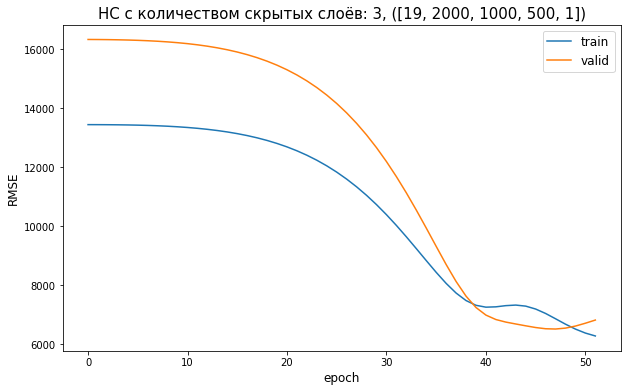

CPU times: user 4.28 s, sys: 228 ms, total: 4.5 s
Wall time: 2.32 s


In [38]:
%%time
net_training(net_3hl_0, 3, net_layers_0, num_epochs, optimizer, loss, train_dataloader, valid_dataloader)

**Комбинация №2**

In [39]:
net_layers_1 = [19, 1000, 500, 250, 1]
net_3hl_1 = Net_3hl(*net_layers_0)

optimizer = torch.optim.Adam(net_3hl_1.parameters(), lr=1e-3)

INFO: Early stopping
Early Stoppning: Epoch 51
RMSE test: 6844.11


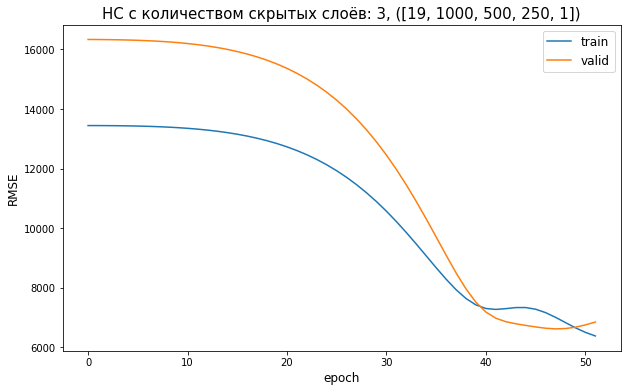

CPU times: user 4.11 s, sys: 212 ms, total: 4.32 s
Wall time: 2.22 s


In [40]:
%%time
net_training(net_3hl_1, 3, net_layers_1, num_epochs, optimizer, loss, train_dataloader, valid_dataloader)

НС с тремя скрытыми слоями обучается быстрее НС с меньшим количеством скрытых слоёв, но, в отличие от предыдущих случаев, при обучении RMSE на валидации меняется не плавно, а присутствует скачки RMSE. После 100 эпохи обучения модель также начинает переобучаться.

Исходя из сравнения трёх архитектур НС с разными комбинациями количества нейронов в скрытых слоях, можно заключить, что в рамках данной задачи оптимальнее использовать нейронную сеть с двумя скрытыми слоями и количеством нейронов в слоях, равным [19, 2000, 1000, 1], и проводить 250 эпох обучения.

Проверим оптимальную НС на тестовой выборке.

### Проверка НС с двумя скрытыми слоями на тестовой выборке

In [41]:
net_layers = [19, 2000, 1000, 1] 

net = Net_2hl(*net_layers)

optimizer = torch.optim.Adam(net.parameters(), lr=1e-3)

loss = RMSELoss()

num_epochs = 500

Для улучшения качества обучения будем обучать модель на выборке, соддержащей тренировочную и валидационную выборки.

**Обучение**

In [42]:
early_stopping = EarlyStopping(patience=4, min_delta=5)
for epoch in range(num_epochs):
    for batch in train_valid_dataloader:
        data_train_valid, temperature_train_valid = batch
        optimizer.zero_grad()

        preds = net.forward(data_train_valid).flatten()

        loss_value = loss.forward(preds, temperature_train_valid)

        loss_value.backward()

        optimizer.step()
        
    for batch in test_dataloader:
        
        data_test, temperature_test = batch
        # перевод сети в режим предсказания
        net.eval()
        # прямое распространение на тестовых данных
        test_preds = net.forward(data_test).flatten()
        # вычисление ошибки на тестовых данных и добавление в массив
        rmse = loss.forward(test_preds, temperature_test)
        
    early_stopping(rmse)
    if early_stopping.early_stop:
        print('Early Stoppning: Epoch', epoch)
        print('RMSE test:', round(rmse.item(), 2))
        break

INFO: Early stopping
Early Stoppning: Epoch 477
RMSE test: 4465.12


**Предсказание**

In [43]:
net.eval()
test_preds = net.forward(X_test).flatten()
rmse_test_2l = loss.forward(test_preds, y_test)
print('Значение RMSE для тестовой выборки:', int(rmse_test_2l.item()))

Значение RMSE для тестовой выборки: 4465


Построим график сравнения факт-прогноз.

In [44]:
test_preds = pd.Series(test_preds.detach().numpy())
test_target = pd.Series(y_test.detach().numpy())

In [45]:
predictions= {'temperature': test_preds, 'type': 'prediction'}
predictions = pd.DataFrame(predictions)
predictions['star_number'] = range(1, len(predictions)+1)

targets = {'temperature': test_target, 'type': 'target'}
targets = pd.DataFrame(targets)
targets['star_number'] = range(1, len(targets)+1)

target_predictions = targets.append(predictions, ignore_index=True)

In [46]:
target_predictions

,temperature,type,star_number
0,"3,463.000",target,1
1,"7,720.000",target,2
2,"3,459.000",target,3
3,"19,860.000",target,4
4,"3,450.000",target,5
...,...,...,...
67,"2,803.910",prediction,32
68,"16,709.156",prediction,33
69,"13,471.734",prediction,34
70,"26,198.777",prediction,35


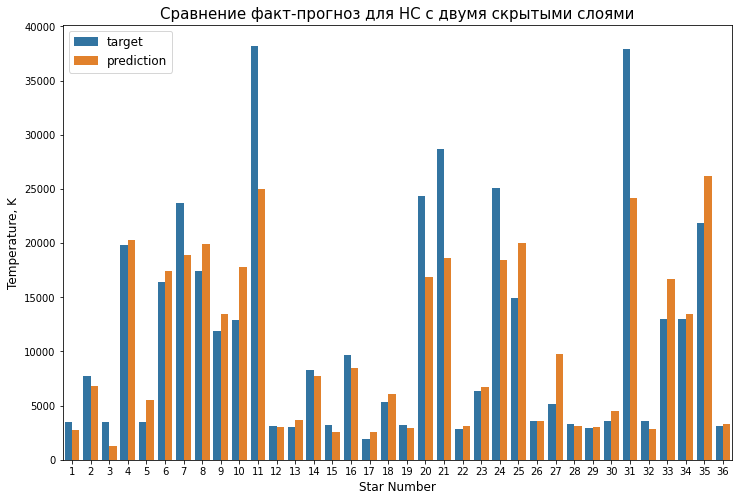

In [47]:
plt.figure(figsize=(12, 8))
sns.barplot(y='temperature', x='star_number',data = target_predictions, hue ='type')


plt.legend(title = None, fontsize=12)

plt.ylabel('Temperature, K', fontsize=12)
plt.xlabel('Star Number', fontsize=12)
plt.title('Сравнение факт-прогноз для НС с двумя скрытыми слоями', fontsize=15)
plt.show()

Анализируя график, можно сделать следующий вывод: модель в целом неплохо предсказывает температуру звёзд, но при этом большие значения температуры (более  25000 К) сильно занижаются на предсказаниях. Скорее всего, это связано с маленьким количеством звёзд с такой температурой поверхности в нашей выборке (см. гистограмму распределения температуры в исследовательском анализе), то есть у модели было недостаточно данных из этой области значений для качественного обучения.

### Вывод

При построении базовой модели были рассмотрены несколько вариантов архитектуры нейронной сети:
* с одним скрытым слоем
* с двумя скрытыми слоями
* с тремя скрытыми слоями

Для каждого типа архитектуры были созданы классы и рассмотрены две комбинаций количества нейронов в скрытых слоях; была создана функция для обучения НС и построения графиков записимости RMSE от итерации обучения для тренировочной и валидационной выборок.

В результате перебора комбинаций для дальнейшего улучшения было решено использовать НС с двумя скрытыми слоями и количеством нейронов в слоях, равным [19, 2000, 1000, 1]. Данная НС позволяет получить для тестовой выборки значение RMSE = 5523 и довольно неплохо предсказывает температуру звёзд в области до 25000 К.

## Улучшение нейронной сети

В рамках улучшения нейронной сети необходимо подобрать оптимальные параметры: dropout и размер батча.

Добавим к НС с двумя скрытыми слоями слой Dropout:

In [48]:
class Net_2hl_do(nn.Module):
    def __init__(self, n_in_neurons, n_hidden_neurons_1,
                 n_hidden_neurons_2, n_out_neurons, dropout):
        super(Net_2hl_do, self).__init__()

        self.fc1 = nn.Linear(n_in_neurons, n_hidden_neurons_1)
        self.act1 = nn.Tanh()
        self.dp1 = nn.Dropout(p=dropout[0])

        self.fc2 = nn.Linear(n_hidden_neurons_1, n_hidden_neurons_2)
        self.act2 = nn.ReLU()
        self.dp2 = nn.Dropout(p=dropout[1])

        self.fc3 = nn.Linear(n_hidden_neurons_2, n_out_neurons)

    def forward(self, x):
        x = self.fc1(x)
        x = self.act1(x)
        x = self.dp1(x)

        x = self.fc2(x)
        x = self.act2(x)
        x = self.dp1(x)

        x = self.fc3(x)
        
        return x

Создадим функцию, с помощью которой будем проводить обучение НС батчами.

In [49]:
def net_butch_training(net_layers, dropout, batch_size, num_epochs, loss, dataset_train, valid_dataloader):
    
    """
    Функция проводит полный цикл обучения НС батчами, выводит значение RMSE на валидационной выборке
    batch_size, dropout; а также вектор предсказаний для валидационной выборки
    """ 
    early_stopping = EarlyStopping(patience=4, min_delta=1)
    net = Net_2hl_do(*net_layers, dropout)
    optimizer = torch.optim.Adam(net.parameters(), lr=1e-3)
    train_dataloader = DataLoader(dataset_train, batch_size=batch_size, shuffle=True, num_workers=0)


    for epoch in range(num_epochs):
        net.train()
        for batch in train_dataloader:
            data_train, temperature_train = batch
            # обнуление градиентов
            optimizer.zero_grad()  
        
            # прямое распространение на обучающих данных
            preds = net.forward(data_train).flatten()

            # вычисление значения функции потерь
            loss_value = loss.forward(preds, temperature_train)

            # вычисление градиентов
            loss_value.backward()

            # шаг оптимизации весов
            optimizer.step()
        
        for batch in valid_dataloader:
            data_valid, temperature_valid = batch
            # перевод сети в режим предсказания
            net.eval()
            # прямое распространение на валидационных данных
            valid_preds = net.forward(data_valid).flatten()
            # вычисление ошибки на валидационных данных и добавление в массив
            rmse = loss.forward(valid_preds, temperature_valid)
            
            
        early_stopping(rmse)
        if early_stopping.early_stop:
            print('Early Stoppning: Epoch', epoch)
            print('RMSE test:', round(rmse.item(), 2))
            valid_preds = valid_preds.detach().numpy() 
            break 
           
    return rmse.item(), batch_size, dropout, valid_preds

Зададим параметры для обучения НС.

In [50]:
net_layers = [19, 2000, 1000, 1] 

# рассмотрим несколько вариантов dropout
dropout_arr = [[0.2, 0.5],
               [0.1, 0.3],
               [0.5, 0.8],
               [0.5, 0.2]]

# рассмотрим несколько размеров батчей
batch_size_arr = [30, 60, 80, 20]

loss = RMSELoss()

num_epochs = 500

In [51]:
%%time

total_arr =[]
for d in dropout_arr:
    dropout = d
    for b in batch_size_arr:
        batch_size = b
        
        print()
        print('Batch Size:', batch_size)
        print('Dropout:', dropout)
                

        # сохраним вывод функции net_butch_training в массив
        total_arr.append([*net_butch_training(net_layers, dropout, batch_size, num_epochs, loss, 
                                      dataset_train, valid_dataloader)]) 
        


Batch Size: 30
Dropout: [0.2, 0.5]
INFO: Early stopping
Early Stoppning: Epoch 34
RMSE test: 6403.2

Batch Size: 60
Dropout: [0.2, 0.5]
INFO: Early stopping
Early Stoppning: Epoch 105
RMSE test: 5849.27

Batch Size: 80
Dropout: [0.2, 0.5]
INFO: Early stopping
Early Stoppning: Epoch 60
RMSE test: 6666.4

Batch Size: 20
Dropout: [0.2, 0.5]
INFO: Early stopping
Early Stoppning: Epoch 35
RMSE test: 6135.47

Batch Size: 30
Dropout: [0.1, 0.3]
INFO: Early stopping
Early Stoppning: Epoch 30
RMSE test: 6553.64

Batch Size: 60
Dropout: [0.1, 0.3]
INFO: Early stopping
Early Stoppning: Epoch 104
RMSE test: 5867.27

Batch Size: 80
Dropout: [0.1, 0.3]
INFO: Early stopping
Early Stoppning: Epoch 80
RMSE test: 6294.85

Batch Size: 20
Dropout: [0.1, 0.3]
INFO: Early stopping
Early Stoppning: Epoch 44
RMSE test: 5883.01

Batch Size: 30
Dropout: [0.5, 0.8]
INFO: Early stopping
Early Stoppning: Epoch 58
RMSE test: 6074.6

Batch Size: 60
Dropout: [0.5, 0.8]
INFO: Early stopping
Early Stoppning: Epoch 59


In [52]:
# преобразуем массив в датафрейм
results = pd.DataFrame(total_arr, columns=['rmse', 'batch_size', 'dropout', 'valid_preds'])
results

,rmse,batch_size,dropout,valid_preds
0,"6,403.201",30,"[0.2, 0.5]","[2828.6394, 17608.059, 17366.14, 4275.2915, 19..."
1,"5,849.270",60,"[0.2, 0.5]","[2961.2363, 17795.082, 19741.143, 4403.487, 19..."
2,"6,666.398",80,"[0.2, 0.5]","[2768.5344, 17143.03, 16250.506, 4949.996, 186..."
3,"6,135.470",20,"[0.2, 0.5]","[2927.1616, 18129.36, 18250.14, 3921.3477, 199..."
4,"6,553.638",30,"[0.1, 0.3]","[2835.1643, 17370.791, 17007.766, 4433.614, 19..."
5,"5,867.267",60,"[0.1, 0.3]","[2977.8403, 17671.111, 19399.346, 4347.7505, 1..."
6,"6,294.853",80,"[0.1, 0.3]","[2588.5354, 17793.404, 18049.223, 4735.552, 19..."
7,"5,883.008",20,"[0.1, 0.3]","[2983.371, 17889.576, 19124.32, 4167.347, 1976..."
8,"6,074.597",30,"[0.5, 0.8]","[2943.123, 17965.906, 18437.742, 4026.9111, 19..."
9,"6,502.370",60,"[0.5, 0.8]","[2747.574, 17547.451, 17266.396, 4682.4844, 19..."


In [53]:
# выведем параметры, соответствующие наименьшему значению rmse
results.query('rmse == rmse.min()')

,rmse,batch_size,dropout,valid_preds
1,"5,849.270",60,"[0.2, 0.5]","[2961.2363, 17795.082, 19741.143, 4403.487, 19..."


### Проверка улучшенной НС на тестовой выборке

Для проверки НС на тестовой выборке обозначим параметры dropout и batch_size, при которых НС даёт минимальное значение RMSE на валидационной выборке.  
Обучим НС на объединённой выборке (тренировочная + валидационная).

In [54]:
dropout = [0.2, 0.5]
batch_size = 60

net_layers = [19, 2000, 1000, 1] 
loss = RMSELoss()

num_epochs = 300

**Обучение**

In [55]:
net = Net_2hl_do(*net_layers, dropout)
optimizer = torch.optim.Adam(net.parameters(), lr=1e-3)
train_dataloader = DataLoader(dataset_train, batch_size=batch_size, shuffle=True, num_workers=0)


for epoch in range(num_epochs):
    net.train()
    for batch in train_dataloader:
        data_train, temperature_train = batch
        # обнуление градиентов
        optimizer.zero_grad()  
        
        # прямое распространение на обучающих данных
        preds = net.forward(data_train).flatten()

            # вычисление значения функции потерь
        loss_value = loss.forward(preds, temperature_train)

            # вычисление градиентов
        loss_value.backward()

            # шаг оптимизации весов
        optimizer.step()

**Предсказание**

In [56]:
for batch in test_dataloader:
        
    data_test, temperature_test = batch
        # перевод сети в режим предсказания
    net.eval()
        # прямое распространение на валидационных данных
    test_final_preds = net.forward(data_test).flatten()
        # вычисление ошибки на валидационных данных и добавление в массив
    rmse_test = loss.forward(test_final_preds, temperature_test)

In [57]:
print('Значение RMSE на тестовой выборке для исходной НС:', int(rmse_test_2l))
print('Значение RMSE на тестовой выборке для улучшенной НС:', int(rmse_test))

Значение RMSE на тестовой выборке для исходной НС: 4465
Значение RMSE на тестовой выборке для улучшенной НС: 4329


Построим график сравнения факт-прогноз для исходной и улучшенной НС.

In [58]:
final_predictions= {'temperature': test_final_preds.detach().numpy(), 'type': 'final_prediction'}
final_predictions = pd.DataFrame(final_predictions)
final_predictions['star_number'] = range(1, len(final_predictions)+1)


target_predictions = target_predictions.append(final_predictions, ignore_index=True)

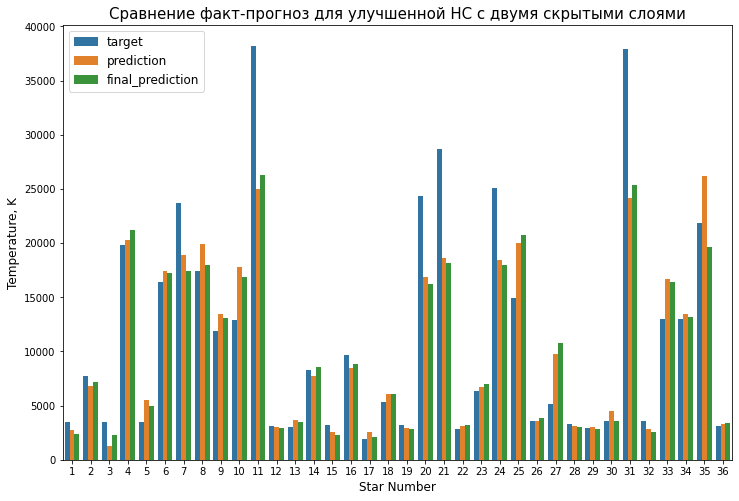

In [59]:
plt.figure(figsize=(12, 8))
sns.barplot(y='temperature', x='star_number',data = target_predictions, hue ='type')


plt.legend(title = None, fontsize=12)

plt.ylabel('Temperature, K', fontsize=12)
plt.xlabel('Star Number', fontsize=12)
plt.title('Сравнение факт-прогноз для улучшенной НС с двумя скрытыми слоями', fontsize=15)
plt.show()

В результате перебора параметров dropout и размера батчей удалось улучшить качество обучения: значение RMSE при неизменной архитектуре НС улучшилось со значения 4465 до 4329. Также при анализе графика сравнения факт-прогноз для исходной и улучшенной НС можно заметить, что улучшенная НС стала предсказывать температуру горячих звёзд (более 25000 К) с меньшей ошибкой по сравнению с исходной моделью.

## Выводы

Целью данного проекта является создание нейронной сети, которая поможет предсказывать температуру поверхности звёзд.   
Для реализации этой цели были выполнены следующие задачи:
* данные о 240 звездах были загружены и предобработаны
* проведён графический анализ, в результате которого были обнаружены следующие интересные закономерности:
    * выборка сбалансирована по типу звёзд
    * у распределений температуры, радиуса и светимости обнаружены тяжелые хвосты
    * зависимость абсолютной звездной величины от температуры в данной выборке представляют собой упрощёную диаграмму Герцшпрунга-Рассела (разделение на кластеры по типу звезд)
* данные были подготовлены к построению модели: выборка была раделена на тренировочную, валидационную и тестовую подвыборки, количественные данные были отмасштабированы, а категориальные - перекодированы с помощью OneHotEncoding

Далее были рассмотрены 3 базовые архитектуры НС:
* с одним скрытым слоем
* с двумя скрытыми слоями
* с тремя скрытыми слоями

Для каждого типа архитектуры были созданы классы и рассмотрены две комбинаций количества нейронов в скрытых слоях; была создана функция для обучения НС и построения графиков записимости RMSE от итерации обучения для тренировочной и валидационной выборок.
Получены следующие закономерности:
* нейронные сети с одним скрытым слоем обучаются дольше всех (требуется более 2000 эпох обучения)
* нейронные сети с тремя скрытыми слоями обучаются "скачками": метрика RMSE на обучении и валидации немонотонна
* нейронные сети с двумя скрытыми слоями показали себя наилучшим образом: значение RMSE монотонно убывает на обучении и валидации примерно до 250 эпохи обучения, после чего модель начинает немного переобучаться.

Исходя из сравнения скорости и качества обучения нейронных сетей с разными архитектурами, было установлено, что в рамках данной задачи оптимальнее использовать нейронную сеть с двумя скрытыми слоями и количеством нейронов в слоях, равным [19, 2000, 1000, 1], и проводить 250 эпох обучения.

При проверке базовой НС на тестовой выборке метрика RMSE составила 4465; было обнаружено, что модель сильно занижает температуру звёзд с поверхностью горячее 25000 К.

В рамках улучшения базовой нейронной сети были подобраны оптимальные параметры: dropout = [0.2, 0.5] и
batch_size = 30. Удалось улучшить качество обучения: значение RMSE при неизменной архитектуре НС уменьшилось до значения 4329 (по условиям проекта, метрика RMSE на тестовых данных не должна превышать 4500).  
При анализе графика сравнения факт-прогноз для исходной и улучшенной НС было замечено, что улучшенная НС стала предсказывать температуру горячих звёзд (более 25000 К) с меньшей ошибкой по сравнению с базовой моделью.